# 401 Assignment 1

## 1 Tuning Hyper-parameters

In [863]:
#imports
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn import datasets, tree, linear_model
from sklearn.model_selection import train_test_split, KFold
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import SGDClassifier

Several helper functions were created:
- get_average 
 - Simply returns the average result of a list
- scale_data
 - A small wrapper function for scaling data appropriately using sklearn's StandardScaler
- is_improvement
 - A function that calculates if the next iteration of the max_depth is a valid improvement. The formula requires that for any 1 increase in the average number of nodes, there should be at least a 1% in accuracy.

In [864]:
# helper functions

def get_average(arr):#returns the average of a python list
    s = 0
    for a in arr:
        s = s + a
    avg = s/len(arr)
    return avg

def scale_data(xtrain, xtest):#scales data using sklearns standard scaler
    feature_scaler = StandardScaler()
    return feature_scaler.fit_transform(xtrain), feature_scaler.transform(xtest)

def is_improvement(prev_accuracy, prev_num_nodes, current_accuracy, current_num_nodes):
    if (prev_accuracy is 0) and (prev_num_nodes is 0):
        return True
    prev_accuracy = prev_accuracy*100
    current_accuracy = current_accuracy*100
    accuracy_improvement = current_accuracy - prev_accuracy
    if accuracy_improvement<=0:
        return False
    node_delta = current_num_nodes - prev_num_nodes
    if accuracy_improvement < node_delta:
        return False
    return True
    

The k-fold cross validation was contained within a method.<br/>
This method takes the training data, as well as some optional parameters relating to the k-fold itself <br/>
The method works through max depths of 1 to 15<br/>
to achieve this the method runs a for loop through each depth in which it defines a new DecisionTreeClasifier. This DT is then KFolded and each set of test and training data within the k-fold is fitted to the tree, with the accuracy and number of nodes recorded. <br/>
For each max depth this is average and used to check if the classifier is a valid improvement.<br>
The method finally displays a dataframe and returns the best classifier

In [865]:
#KFold CV Method
def run_KFold_CV(XTrainKF, yTrainKF, n_splits=6, random_state = 0, shuffle = False):
    df = pd.DataFrame(columns=['Max_Tree_Depth', 'Average_Accuracy', 'Average_Node_Count'])
    depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    prev_avg_accuracy = 0
    prev_num_nodes = 0
    for depth in depths:
        kf_tree = tree.DecisionTreeClassifier(max_depth=depth)
        kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=shuffle)
        accuracy = []
        num_nodes = []
        for train_index, test_index in kf.split(XTrainKF):
            x_train, x_test = XTrainKF[train_index], XTrainKF[test_index]
            y_train, y_test = yTrainKF[train_index], yTrainKF[test_index]
            kf_tree = kf_tree.fit(x_train, y_train)
            predictions = kf_tree.predict(x_test)
            accuracy.append(kf_tree.score(x_test, y_test))
            num_nodes.append(kf_tree.tree_.node_count)
            acc_avg = get_average(accuracy)
            num_nodes_avg = get_average(num_nodes)
        df = df.append({'Max_Tree_Depth':depth, 'Average_Accuracy':acc_avg, 'Average_Node_Count': num_nodes_avg}, ignore_index=True)
        if is_improvement(prev_avg_accuracy, prev_num_nodes, acc_avg, num_nodes_avg):
            prev_avg_accuracy, prev_num_nodes = acc_avg, num_nodes_avg
            best_depth = depth
            best_tree = kf_tree
    display(df)
    print("The best classifier was found with depth ", best_depth)
    return best_tree

def test_best_tree(best_tree, x_test, y_test):
    predictions = best_tree.predict(x_test)
    accuracy = best_tree.score(x_test, y_test)
    print("The best classifier achieved an accuracy of ", accuracy, " on the test data")
 

### Iris plant recognition

In [866]:
# Iris plant recognition  
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_Y, test_size=0.3, random_state=0)
iris_X_train, iris_X_test = scale_data(iris_X_train, iris_X_test)

iris_best_tree = run_KFold_CV(iris_X_train, iris_y_train)
test_best_tree(iris_best_tree, iris_X_test, iris_y_test)

,Max_Tree_Depth,Average_Accuracy,Average_Node_Count
0,1.0,0.611111,3.000000
1,2.0,0.924292,5.000000
2,3.0,0.961874,8.333333
3,4.0,0.942810,11.666667
4,5.0,0.942810,11.333333
5,6.0,0.952070,11.333333
6,7.0,0.952070,11.333333
7,8.0,0.942810,11.666667
8,9.0,0.952070,11.333333
9,10.0,0.942810,11.333333


The best classifier was found with depth  3
The best classifier achieved an accuracy of  0.9777777777777777  on the test data


### Breast cancer diagnosis

In [867]:
# Breast cancer diagnosis
breast_cancer = datasets.load_breast_cancer()
breast_cancer_X = breast_cancer.data
breast_cancer_Y = breast_cancer.target

breast_cancer_X_train, breast_cancer_X_test, breast_cancer_y_train, breast_cancer_y_test = train_test_split(breast_cancer_X, breast_cancer_Y, test_size=0.3, random_state=0)
breast_cancer_X_train, breast_cancer_X_test = scale_data(breast_cancer_X_train, breast_cancer_X_test)

breast_cancer_best_tree = run_KFold_CV(breast_cancer_X_train, breast_cancer_y_train)
test_best_tree(breast_cancer_best_tree, breast_cancer_X_test, breast_cancer_y_test)

,Max_Tree_Depth,Average_Accuracy,Average_Node_Count
0,1.0,0.909543,3.000000
1,2.0,0.909619,7.000000
2,3.0,0.924732,14.000000
3,4.0,0.922132,21.333333
4,5.0,0.917157,26.666667
5,6.0,0.912144,28.666667
6,7.0,0.922169,29.666667
7,8.0,0.922169,30.333333
8,9.0,0.912182,30.000000
9,10.0,0.907056,30.000000


The best classifier was found with depth  1
The best classifier achieved an accuracy of  0.8947368421052632  on the test data


### Digit Recognition

In [868]:
# Digit recognition
#manipulate data into (samples, feature) matrix
digits = datasets.load_digits()
digits_n_samples = len(digits.images)
digits_X = digits.images.reshape((digits_n_samples), -1)
digits_y = digits.target

digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits_X, digits_y, test_size=0.3, random_state=0)
digits_X_train, digits_X_test = scale_data(digits_X_train, digits_X_test)

digits_best_tree = run_KFold_CV(digits_X_train, digits_y_train)
test_best_tree(digits_best_tree, digits_X_test, digits_y_test)


,Max_Tree_Depth,Average_Accuracy,Average_Node_Count
0,1.0,0.189333,3.000000
1,2.0,0.316648,7.000000
2,3.0,0.460652,15.000000
3,4.0,0.641976,30.333333
4,5.0,0.708810,53.666667
5,6.0,0.770851,84.333333
6,7.0,0.820217,125.333333
7,8.0,0.830554,166.333333
8,9.0,0.835323,200.000000
9,10.0,0.833732,220.000000


The best classifier was found with depth  4
The best classifier achieved an accuracy of  0.6518518518518519  on the test data


## 2 Decision trees vs linear models

Constructing the problem was

In [869]:
#Constructing the problem
random.seed( 5577993311 )
def my_problem(x):
    return x,x*(1+random.randint(1,5)/50)
    #return x,2*x

def get_random_fail(x):
    return x, x*(1-random.randint(1,5)/50)
    #return x, x*0.5

def create_dataset(n=100):
    dataset_x = []
    dataset_y = []
    for i in range(1,n):
        if random.randint(0,10) % 2 == 0:
            dataset_x.append(my_problem(i))
            dataset_y.append(1)
        else:
            dataset_x.append(get_random_fail(i))
            dataset_y.append(0)
    return dataset_x, dataset_y


DecisionTreeClassifier with max_depth = 8 and score =  0.8


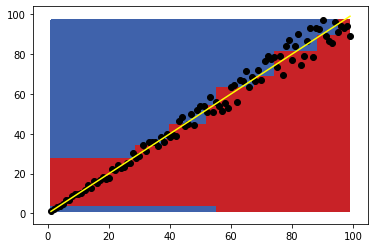

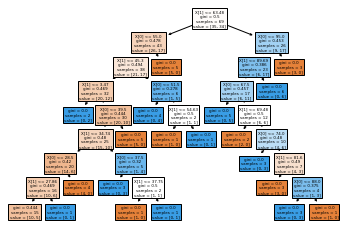

,Dataset Size,Score
0,20.0,0.833333
1,25.0,0.625000
2,30.0,0.888889
3,35.0,0.909091
4,40.0,0.750000
5,45.0,1.000000
6,50.0,0.800000
7,55.0,0.647059
8,60.0,1.000000


,Dataset Size,Max Depth,Score
0,20.0,1.0,0.666667
1,20.0,3.0,0.833333
2,20.0,5.0,0.833333
3,20.0,7.0,0.833333
4,20.0,9.0,0.833333
5,20.0,11.0,0.833333
6,20.0,13.0,0.833333
7,25.0,1.0,0.500000
8,25.0,3.0,0.250000
9,25.0,5.0,0.125000


In [870]:
#

ldf = pd.DataFrame(columns=['Dataset Size', 'Score'])
tdf = pd.DataFrame(columns=['Dataset Size', 'Max Depth', 'Score'])
for k in range(20, 61, 5):
    x,y = create_dataset(k)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    linear = linear_model.SGDClassifier()
    linear.fit(x_train, y_train)
    linear_predict = linear.predict(x_test)
    linear_predict = linear_predict.tolist()
    #l_accuracy = accuracy_score(y_test, linear_predict)
    l_score = linear.score(x_test, y_test)
    ldf = ldf.append({'Dataset Size':k, 'Score':l_score}, ignore_index=True)
    for l in range(1,15,2):
        d_tree = tree.DecisionTreeClassifier(max_depth=l)
        d_tree = d_tree.fit(x_train, y_train)
        d_tree_predict = d_tree.predict(x_test)
        #d_tree_accuracy = accuracy_score(y_test, d_tree_predict)
        score = d_tree.score(x_test, y_test)
        tdf = tdf.append({'Dataset Size':k, 'Max Depth':l,'Score':score}, ignore_index=True)

x, y = create_dataset(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
d_tree = tree.DecisionTreeClassifier(max_depth=8)
d_tree = d_tree.fit(x_train, y_train)
d_tree_predict = d_tree.predict(x_test)
#d_tree_accuracy = accuracy_score(y_test, d_tree_predict)
score = d_tree.score(x_test, y_test)
print('DecisionTreeClassifier with max_depth = 8 and score = ', score)

#PLOT THE DTREE BOUNDARY
plot_step = 0.02
X=x
Y=y
x_min, x_max = min([a for a,_ in x]), max([a for a,_ in x])
y_min, y_max = min([a for _,a in x]), max([a for _,a in x])
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = d_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

#Plot points
i = range(1,100,1)
plt.scatter([a for a,_ in x], [a for _,a in x], color='black')
plt.plot(i,i, color='yellow')
plt.xticks()
plt.yticks()
plt.figure()
plot_tree(d_tree, filled=True)
plt.show()



display(ldf)
display(tdf)
        #print(score)

## 3 Regression on mixed data types